# Saarthak Marathe | ME17B162 
# Classification : Nearest Neighbors and Naive Bayes 

## Classification using Nearest Neighbors

(a) Perform k-Nearest neighbours on the given dataset($X_{knn}$ and $y_{knn}$: where $X_{knn}$ stores feature vectors representing the movies and  $y_{knn}$ stores the 0-1 labelling for each movie) for binary classification of movies, for classifiying whether a given movie is a comedy(label 1) or not a comedy(label 0) . Split the dataset into train(80%), validation(10%) and test sets(10%).Run k-Nearest neighbours for different k values (1,3,7,15,31,63). Select the k, using validation set, which returns the best accuracy score. 

(i)  Report all the validation accuracies for all the values of k. 
<br>(ii) Report accuracy score by performing k-NN on the test dataset using the best chosen k value. 

In [2]:
## write your code here.
import pandas as pd
x_knn = pd.read_csv('X_knn.csv', header = None)
y_knn = pd.read_csv('y_knn.csv', header = None)

In [30]:
x = [0]*len(x_knn)
for i in range(len(x_knn)):
    x[i] = [float(x) for x in x_knn[0][i].split()] 

In [34]:
y = [0]*len(y_knn)
for i in range(len(x_knn)):
    y[i] = y_knn[0][i]

In [35]:
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x, y, test_size=0.10)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.111)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

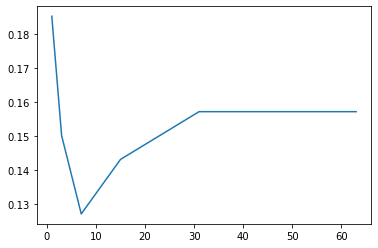

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
k = [1,3,7,15,31,63]
error = []
for i in range(len(k)):
    classifier = KNeighborsClassifier(n_neighbors=k[i])
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    error.append(np.mean(y_pred != y_val))
plt.plot(k, error)

In [41]:
for i in range(len(k)):
    print('k: %f, Error: %f' %(k[i], error[i]))

k: 1.000000, Error: 0.185185
k: 3.000000, Error: 0.150150
k: 7.000000, Error: 0.127127
k: 15.000000, Error: 0.143143
k: 31.000000, Error: 0.157157
k: 63.000000, Error: 0.157157


**Write the results here**

From the graph, it is evident that the highest accuracy (lowest error) is for k = 7

In [149]:
#for test dataset
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
error = (np.mean(y_pred != y_test))
print('Accuracy for the test data:', 1-error)

Accuracy for the test data: 0.8109999999999999


**(b) State why using an even value of k in k-NN should not be chosen**

Odd values for k are chosen mainly to avoid any ties with class label scores (distance) during cluster classification

## Learning Naive Bayes' classifier  

### From Continuous Distribution of data

Here, the distribution of the data( $X$ represents the datapoints and $Y$ represents the 0-1 binary-class label; where 0 being the negative class and 1 being the positive class) is already known.
<br>Consider the following one-dimensional(1-D) Gaussian distributions where means and variances are unknown. You need to estimate means($\mu_-$: for negative class and  $\mu_+$: for positive class) and variances ($\sigma^{2}_{-}$: for negative class and $\sigma^{2}_+$: for positive class) from the given data : 
<br> (1) Assume $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ 
<br>(2) Assume $X|Y_{Y=1} \sim \mathcal{N}(\mu_+ , \sigma^{2}_+)$


*Generating artificial datasets in the next cell *

In [42]:
## This cell is for generating datasets. Students should not change anything in this cell. 
## You can compare your mean and variance estimates by the actual ones used to generate these datasets

import numpy as np
X_pos = np.random.randn(1000,1)+np.array([[2.]])
X_neg = np.random.randn(1000,1)+np.array([[4.]])
X_train_pos = X_pos[:900]
X_train_neg = X_neg[:900]
X_test_pos = X_pos[900:]
X_test_neg = X_neg[900:]
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_train = np.concatenate(( np.ones(900),np.zeros(900) ))
Y_test = np.concatenate(( np.ones(100), np.zeros(100) ))

## X_train, X_test, Y_train, Y_test are your datasets to work with ####



<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Utilize the training dataset to estimate the means($\hat{\mu_+}$,$\hat{\mu_-}$) and variances($\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$) for both positive and negative classes  
b)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$ 
<br>c)Estimate the classifier funtion/posterior probability:  $P(Y=1|X = x)$  ⟶ which could be referred to as $\hat{\eta(x)}$
<br>d)Find out the threshold value($x^*$) for classification by equating the estimated classifier function($\hat{\eta(x)}$)  with threshold probability of 0.5
<br>e)Classify the test dataset into the two classes using this threshold value($x^*$) and find out the **accuracy** of the prediction 

Return back:  $\hat{\mu_+}$, $\hat{\mu_-}$, $\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$, $\hat{a}$, $x^*$ and accuracy from the code written 

*Hint: $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ implies $P_{X|Y=0} = \mathcal{N}(\mu_- , \sigma^{2}_-) $*


In [95]:
## write your code here.  

#mean and variance for both the datas
def mean(x):
    sum = 0
    for i in range(len(x)):
        sum = sum + x[i]
    return sum/len(x)

def variance(x):
    mu = mean(x)
    var=0
    for i in range(len(x)):
        var = var + (((x[i] - mu)**2)/(len(x)-1))
    return var
mean_pos = mean(X_train_pos)
mean_neg = mean(X_train_neg)
var_pos = variance(X_train_pos)
var_neg = variance(X_train_neg)

In [96]:
#prior probability
ones = 0
for i in range(len(Y_train)):
    if Y_train[i] == 1:
        ones = ones + 1
ahat = ones/len(Y_train)

In [97]:
#from scipy.stats import norm
import math
def muhat(x):
    pdf_pos = (1/(var_pos*(math.sqrt(2*math.pi))))*(math.exp((-1/2)*(((x-mean_pos)/var_pos)**2)))
    pdf_neg = (1/(var_neg*(math.sqrt(2*math.pi))))*(math.exp((-1/2)*(((x-mean_neg)/var_neg)**2)))
    
    return ahat*pdf_pos/(ahat*pdf_pos + ((1-ahat)*pdf_neg))

In [98]:
muhatarr = {}
for i in range(len(X_train)):
    muhatarr[i] = muhat(X_train[i])
    #muhatarr[i][0] = X_train[i]
sort_muhatarr = sorted(muhatarr.items(), key=lambda x: x[1], reverse=False)

for i in range(len(muhatarr)):
    if sort_muhatarr[i][1][0] >= 0.5:
        thres_no = (sort_muhatarr[i][0])
        #print(thres_no)
        break
        
print('Threshold value of x: x* = ', X_train[thres_no])

Threshold value of x: x* =  [2.99129226]


In [99]:
from sklearn.metrics import confusion_matrix
Y_test_pred=[]
for x in X_test:
    p1 = muhat(x)
    if p1<0.5: 
        Y_test_pred.append(0)
    else : 
        Y_test_pred.append(1)
Y_test_pred = np.array(Y_test_pred)
m = confusion_matrix(Y_test,Y_test_pred)
print('Confusion matrix:\n',m)

Confusion matrix:
 [[80 20]
 [15 85]]


In [100]:
print('Mean for positive data: mean_pos_hat = ', mean_pos)
print('Mean for negative data: mean_neg_hat = ', mean_neg)
print('Variance for positive data: var_pos_hat = ', var_pos)
print('Variance for negative data: var_neg_hat = ', var_neg)
print('Prior probability for Y=1: a_hat = ', ahat)
print('Accuracy : '+str((m[0][0]+m[1][1])/len(X_test)))

Mean for positive data: mean_pos_hat =  [1.97611506]
Mean for negative data: mean_neg_hat =  [4.01365675]
Variance for positive data: var_pos_hat =  [0.97324824]
Variance for negative data: var_neg_hat =  [1.02425662]
Prior probability for Y=1: a_hat =  0.5
Accuracy : 0.825


### From Discrete distribution of data

Unlike the first exercise for learning the Naive Bayes' classifier where we dealt with continuous distribution of data, here you need to work with discrete data, which means finding Probability Mass Distribution(PMF). 

Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no
 
Consider the train dataset above. Take any random datapoint ($X_{i}$) where $X_{i} = (X_{i,1} = Age,X_{i,2} = Income,X_{i,3} = Status)$ and its corresponding label 

($Y_{i} = Buy$). A "yes" in Buy corresponds to label-1 and a "no" in Buy corresponds to label-0.

<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$   
b)Estimate the likelihood for each feature:  $P(X_{i,j} = x |Y = y_{i})$, where $ i$=datapoint counter, $j \in \{1,2,3\}$ and $y_{i} \in \{0,1\}$ 
<br>c)Estimate the total likelihood: $P(X_{i} = x |Y = y_{i})$  
d)Calculate the posterior probability: $P(Y = 1|X_{i} = x_{test} )$ = $p_{test}$ where $x_{test} = (Age = 21-30, Income= medium, Status = married)$


Return back: $\hat{a}$, total likelihood and $p_{test}$ 


In [3]:
## write your code here.
df = pd.read_csv('discretedata.txt',delimiter="\t")

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(len(df.columns)):
    le.fit(df[df.columns[i]])
    df[df.columns[i]] = le.transform(df[df.columns[i]])

In [10]:
df

,Age,Income,Status,Buy
0,1,1,1,1
1,1,0,1,1
2,1,2,1,0
3,1,2,0,0
4,1,0,0,1
5,0,1,0,1
6,0,1,0,0
7,0,2,1,0
8,0,0,1,1
9,2,0,0,0


In [6]:
#prior probability
ones = 0
for i in range(len(df['Buy'])):
    if df['Buy'][i] == 1:
        ones = ones + 1
ahat = ones/len(df['Buy'])

In [16]:
#likelihood for each feature

#Age
#age1 age<=20
#age0 age = 21-30
#age2 age>30
age = [0]*3
for i in range(len(df['Age'])):
    if df['Age'][i] == 0 and df['Buy'][i] == 1:
        age[0] = age[0] + 1
    if df['Age'][i] == 1 and df['Buy'][i] == 1:
        age[1] = age[1] + 1
    if df['Age'][i] == 2 and df['Buy'][i] == 1:
        age[2] = age[2] + 1
        
print('P(Xi,1 = <=20 | Y=1) = ', (age[1]/len(df['Age']))/ahat)
print('P(Xi,1 = 21-30 | Y=1) = ', (age[0]/len(df['Age']))/ahat)
print('P(Xi,1 = >30 | Y=1) = ', (age[2]/len(df['Age']))/ahat)
print('P(Xi,1 = <=20 | Y=0) = ', ((len(df[df['Age'] == 1])-age[1])/len(df['Age']))/(1-ahat))
print('P(Xi,1 = 21-30 | Y=0) = ', ((len(df[df['Age'] == 0])-age[0])/len(df['Age']))/(1-ahat))
print('P(Xi,1 = >30 | Y=0) = ', ((len(df[df['Age'] == 2])-age[2])/len(df['Age']))/(1-ahat))

#Income
#income1 low
#income0 high
#income2 medium
income = [0]*3
for i in range(len(df['Income'])):
    if df['Income'][i] == 0 and df['Buy'][i] == 1:
        income[0] = income[0] + 1
    if df['Income'][i] == 1 and df['Buy'][i] == 1:
        income[1] = income[1] + 1
    if df['Income'][i] == 2 and df['Buy'][i] == 1:
        income[2] = income[2] + 1
        
print('\nP(Xi,2 = low | Y=1) = ', (income[1]/len(df['Income'])/ahat))
print('P(Xi,2 = high | Y=1) = ', (income[0]/len(df['Income'])/ahat))
print('P(Xi,2 = medium | Y=1) = ', (income[2]/len(df['Income'])/ahat))
print('P(Xi,2 = low | Y=0) = ', ((len(df[df['Income'] == 1])-income[1])/len(df['Income']))/(1-ahat))
print('P(Xi,2 = high | Y=0) = ', ((len(df[df['Income'] == 0])-income[0])/len(df['Income']))/(1-ahat))
print('P(Xi,2 = medium | Y=0) = ', ((len(df[df['Income'] == 2])-income[2])/len(df['Income']))/(1-ahat))
        
#Status
#status1 student
#status0 married
status = [0]*2
for i in range(len(df['Status'])):
    if df['Status'][i] == 0 and df['Buy'][i] == 1:
        status[0] = status[0] + 1
    if df['Status'][i] == 1 and df['Buy'][i] == 1:
        status[1] = status[1] + 1
print('\nP(Xi,3 = student | Y=1) = ', (status[1]/len(df['Status'])/ahat))
print('P(Xi,3 = married | Y=1) = ', (status[0]/len(df['Status'])/ahat))
print('P(Xi,3 = student | Y=0) = ', ((len(df[df['Status'] == 1])-status[1])/len(df['Status']))/(1-ahat))
print('P(Xi,3 = married | Y=0) = ', ((len(df[df['Status'] == 0])-status[0])/len(df['Status']))/(1-ahat))

P(Xi,1 = <=20 | Y=1) =  0.42857142857142855
P(Xi,1 = 21-30 | Y=1) =  0.2857142857142857
P(Xi,1 = >30 | Y=1) =  0.2857142857142857
P(Xi,1 = <=20 | Y=0) =  0.2857142857142857
P(Xi,1 = 21-30 | Y=0) =  0.2857142857142857
P(Xi,1 = >30 | Y=0) =  0.42857142857142855

P(Xi,2 = low | Y=1) =  0.2857142857142857
P(Xi,2 = high | Y=1) =  0.5714285714285714
P(Xi,2 = medium | Y=1) =  0.14285714285714285
P(Xi,2 = low | Y=0) =  0.14285714285714285
P(Xi,2 = high | Y=0) =  0.14285714285714285
P(Xi,2 = medium | Y=0) =  0.7142857142857143

P(Xi,3 = student | Y=1) =  0.42857142857142855
P(Xi,3 = married | Y=1) =  0.5714285714285714
P(Xi,3 = student | Y=0) =  0.42857142857142855
P(Xi,3 = married | Y=0) =  0.5714285714285714


In [17]:
#total likelihood
for i in range(len(age)):
    for j in range(len(income)):
        for k in range(len(status)):
            prob_1 = (age[i]*income[j]*status[k])/(((len(df['Age']))**3)*ahat)
            prob_0 = ((len(df[df['Age'] == i]) - age[i])*(len(df[df['Income'] == j]) - income[j])*(len(df[df['Status'] == k]) - status[k]))/(((len(df['Age']))**3)*(1-ahat))
            print('P(age =',i,', income =', j,', status =', k,'| Y=1):', prob_1)
            print('P(age =',i,', income =', j,', status =', k,'| Y=0):', prob_0)

P(age = 0 , income = 0 , status = 0 | Y=1): 0.023323615160349854
P(age = 0 , income = 0 , status = 0 | Y=0): 0.0058309037900874635
P(age = 0 , income = 0 , status = 1 | Y=1): 0.01749271137026239
P(age = 0 , income = 0 , status = 1 | Y=0): 0.004373177842565598
P(age = 0 , income = 1 , status = 0 | Y=1): 0.011661807580174927
P(age = 0 , income = 1 , status = 0 | Y=0): 0.0058309037900874635
P(age = 0 , income = 1 , status = 1 | Y=1): 0.008746355685131196
P(age = 0 , income = 1 , status = 1 | Y=0): 0.004373177842565598
P(age = 0 , income = 2 , status = 0 | Y=1): 0.0058309037900874635
P(age = 0 , income = 2 , status = 0 | Y=0): 0.029154518950437316
P(age = 0 , income = 2 , status = 1 | Y=1): 0.004373177842565598
P(age = 0 , income = 2 , status = 1 | Y=0): 0.021865889212827987
P(age = 1 , income = 0 , status = 0 | Y=1): 0.03498542274052478
P(age = 1 , income = 0 , status = 0 | Y=0): 0.0058309037900874635
P(age = 1 , income = 0 , status = 1 | Y=1): 0.026239067055393587
P(age = 1 , income = 0 

In [9]:
#posterior probability

#𝑥𝑡𝑒𝑠𝑡=(𝐴𝑔𝑒=21−30,𝐼𝑛𝑐𝑜𝑚𝑒=𝑚𝑒𝑑𝑖𝑢𝑚,𝑆𝑡𝑎𝑡𝑢𝑠=𝑚𝑎𝑟𝑟𝑖𝑒𝑑)
#age = 0, income = 2, status = 0
age0=0
income2=0
status0=0
for i in range(len(df['Age'])):
    if df['Age'][i] == 0: 
        age0 = age0 + 1
    if df['Income'][i] == 2:
        income2 = income2 + 1
    if df['Status'][i] == 0:
        status0 = status0 + 1
        
num = ((age[0]/len(df['Age']))/ahat)*((income[2]/len(df['Income']))/ahat)*((status[0]/len(df['Status']))/ahat)*ahat
den = (age0*income2*status0)/((len(df['Age']))**3)

p_test = num/den
print('P_test for the given x_test is =', p_test)
print('Required a_hat=', ahat)

P_test for the given x_test is = 0.16666666666666663
Required a_hat= 0.5
